# Лабораторна робота №1

### Дослідження та візуалізація даних за допомогою Python

**Виконав\
студент групи КН-221а\
Медвідь Роман Ігорович\
Перевірив\
асистент кафедри\
Звєрцев Герман Олександрович**

### Мета: отримати базові навики використання Python для дослідження та візуалізації даних.


In [4]:
N = ord("R") % 3 + 1
print(N)

2


Варіант 2. Дослідження втрат танків
1. Створіть функцію, яка приймає назву файлу та назву стовпця як
параметр і повертає масив numpy зі значеннями стовпця.
2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «tank».
3. Знайдіть добові втрати танків.
4. Знайдіть 4 найбільші добові втрати танків.
5. Визначте, скільки танків було знищено навесні 2023 року.
6. Знайдіть середнє значення знищених танків за останні 100 днів війни.
7. Створіть графік втрат танків за минулий рік (починаючи з останньої дати в наборі даних)

Daily losses: 
[66  4  0 48 13  6 34 18 16  5 13 14 18 18  9 12 15 15 26 14  6 16 10 22
 11  8 13 31 14  7  4 11  8  9 11  6 13  3 29  8 14  2  5 17  3  7  7 14
  3  6 11 17 12 13 14  9 16 19 11 34 21 31 16 22 18 22 14 15 15 18 12  8
 15 25 17  8 10 13  2  8  7 16  3  9 15  7  8  9  3 10  7  8  8 11  9  3
  2  4  9  5  5  4  3  5 11 10 11  2  2  6  9  7  9  3  9 19  0  8  3  4
 21 20 15  5  1  4  5  2  5  5  6  2 35  1  3  4  4  0 18  5  5  7  3  4
  9  4  0  4 14  8  7  1  4  7 10  4  5  0  6 15  3 10  3  6  6 15 14  3
  7  8 12  4  6  3 10  8  5  7  2  3  5  7  3  3  5  7 20 23 12 25 15 19
  9 20 15 10 14 18 15  6  5 13  6  3  8  2  4 11  9 18  8 13 15 16  6 13
 13 16 23  3 44 11 14 17  6 14  9  9  1  6 10  3  5  8 11  6 13  6  6  5
  6 21 17  3  9 19 13 14 12 16 20 16  8  7  6 15 15  3 10 24  2  8 13 10
  7  1  6  1  6  3  2  1  1  2  4  3  3  3  1  1  1  5  2  5  6  2  0  3
  2 24  0  4  5  5  5  2  1  7  7  0  3  1  5  5  0  1  1  8  3  2  0  5
  2  3 23  2  3 11  4 10  0  4  6  2

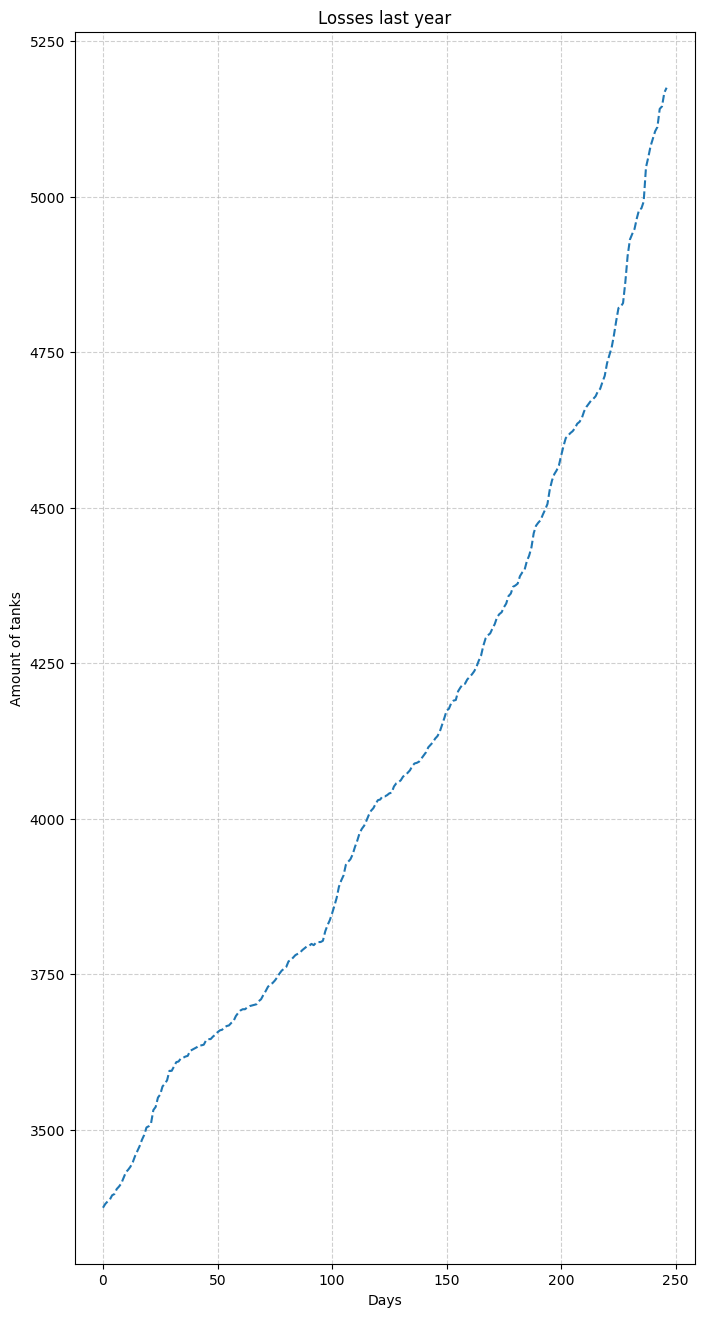

In [54]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def get_data_from_column(filename, column_name, dtype):
    with open(path, 'r') as file:
        reader = csv.DictReader(file)
        data = [row[column_name] for row in reader]
        return np.array(data, dtype = dtype)

def daily_losses(data_tanks):
    return np.diff(data_tanks)

def top4_losses(daily):
    return np.sort(daily)[-4:]

def spring_losses():
    dates = get_data_from_column(path, 'date', str)
    start = np.where(dates == '2023-03-01')[0][0]
    end = np.where(dates == '2023-05-31')[0][0]
    return data_tanks[end] - data_tanks[start]

def average_losses_tanks(data_tanks): #last 100
    return np.mean(data_tanks[99])

def last_year_losses():
    last_year_losses = data_tanks[365:]
    dates = np.arange(len(last_year_losses))
    total_losses = data_tanks[-1]
    plt.plot(dates, last_year_losses, linestyle = '--', label = 'Tank losses')
    plt.title('Losses last year')
    plt.xlabel('Days')
    plt.ylabel('Amount of tanks')
    plt.grid(True, linestyle = '--', alpha = 0.6)
    plt.gcf().set_size_inches(8, 16)
    plt.gcf().set_dpi(100)
    plt.savefig('losses.png', dpi=100)
    plt.show()

path = "russia_losses_equipment.csv"
data_tanks = get_data_from_column(path, 'tank', int)

daily = daily_losses(data_tanks)
print("Daily losses: ")
print(daily)

top4 = top4_losses(daily)
print("\nTop(4) tank losses: ")
print(top4)

spring = spring_losses()
print("\nSpring losses: ")
print(spring)

average = average_losses_tanks(data_tanks)
print("\nAverage losses: ")
print(average)

last_year_losses()